In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
import logging

tf.get_logger().setLevel(logging.ERROR)

2025-07-16 19:39:14.940042: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-16 19:39:14.941507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 19:39:14.947437: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 19:39:14.963743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752712754.991432  273668 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752712754.99

In [2]:
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = "../data/book_store_sales.csv"


def readfile(file_name):
    file = open(file_name, "r", encoding="utf-8")
    next(file)
    data = []
    for line in file:
        values = line.split(",")
        data.append(float(values[1]))

    file.close()
    return np.array(data, dtype=np.float32)


sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

In [3]:
len(train_sales)

320

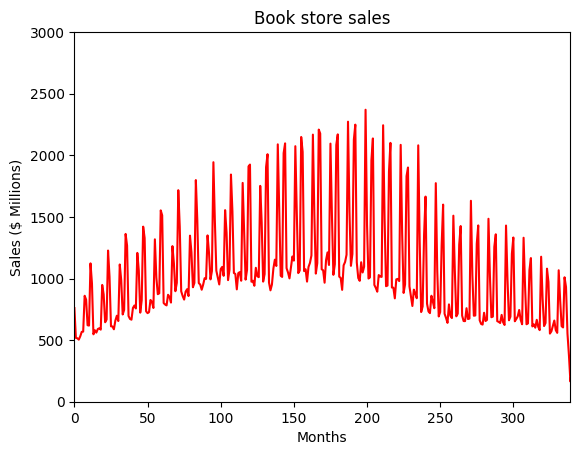

In [4]:
x = range(len(sales))
plt.plot(x, sales, "r-", label="book sales")
plt.title("Book store sales")
plt.axis([0, 339, 0.0, 3000])
plt.xlabel("Months")
plt.ylabel("Sales ($ Millions)")
plt.show()

In [5]:
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN - 1 : -1]

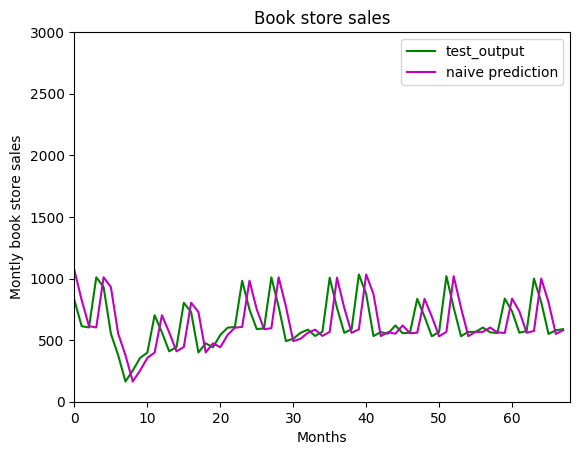

In [6]:
x = range(len(test_output))
plt.plot(x, test_output, "g-", label="test_output")
plt.plot(x, naive_prediction, "m-", label="naive prediction")
plt.title("Book store sales")
plt.axis([0, len(test_output), 0.0, 3000])
plt.xlabel("Months")
plt.ylabel("Montly book store sales")
plt.legend()
plt.show()

In [7]:
mean = np.mean(train_sales)
sttdev = np.std(train_sales)
train_sales_std = (train_sales - mean) / sttdev
test_sales_std = (test_sales - mean) / sttdev

# create training examples
train_months = len(train_sales)
train_x = np.zeros((train_months - MIN, train_months - 1, 1))
train_y = np.zeros((train_months - MIN, 1))
for i in range(0, train_months - MIN):
    train_x[i, -(i + MIN) :, 0] = train_sales_std[0 : i + MIN]
    train_y[i, 0] = train_sales_std[i + MIN]

# creates test examples
test_months = len(test_sales)
test_x = np.zeros((test_months - MIN, test_months - 1, 1))
test_y = np.zeros((test_months - MIN, 1))
for i in range(0, test_months - MIN):
    test_x[i, -(i + MIN) :, 0] = test_sales_std[0 : i + MIN]
    test_y[i, 0] = test_sales_std[i + MIN]

In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(SimpleRNN(128, activation="relu", input_shape=(None, 1),kernel_initializer='he_normal'))
model.add(Dense(1, activation="linear"))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 - 1s - 70ms/step - loss: 0.9797 - mean_absolute_error: 0.7564 - val_loss: 0.3091 - val_mean_absolute_error: 0.4465
Epoch 2/100
20/20 - 1s - 30ms/step - loss: 0.3766 - mean_absolute_error: 0.4437 - val_loss: 0.8163 - val_mean_absolute_error: 0.8013
Epoch 3/100
20/20 - 1s - 29ms/step - loss: 0.1480 - mean_absolute_error: 0.2741 - val_loss: 0.3528 - val_mean_absolute_error: 0.4869
Epoch 4/100
20/20 - 1s - 29ms/step - loss: 0.1005 - mean_absolute_error: 0.2242 - val_loss: 0.2096 - val_mean_absolute_error: 0.3764
Epoch 5/100
20/20 - 1s - 30ms/step - loss: 0.1079 - mean_absolute_error: 0.2483 - val_loss: 0.2425 - val_mean_absolute_error: 0.3829
Epoch 6/100
20/20 - 1s - 29ms/step - loss: 0.0785 - mean_absolute_error: 0.2070 - val_loss: 0.2455 - val_mean_absolute_error: 0.4015
Epoch 7/100
20/20 - 1s - 28ms/step - loss: 0.0667 - mean_absolute_error: 0.1905 - val_loss: 0.2983 - val_mean_absolute_error: 0.4194
Epoch 8/100
20/20 - 1s - 28ms/step - loss: 0.0639 - mean_absolute_err

In [22]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(SimpleRNN(128, activation="relu", input_shape=(None, 1),kernel_initializer='he_normal', kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)
model.summary()
history = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True,
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 - 2s - 81ms/step - loss: 35.0925 - mean_absolute_error: 1.8175 - val_loss: 29.0246 - val_mean_absolute_error: 0.4830
Epoch 2/100
20/20 - 1s - 32ms/step - loss: 29.7172 - mean_absolute_error: 0.9085 - val_loss: 29.5603 - val_mean_absolute_error: 1.1292
Epoch 3/100
20/20 - 1s - 33ms/step - loss: 29.0809 - mean_absolute_error: 0.8285 - val_loss: 27.9002 - val_mean_absolute_error: 0.4742
Epoch 4/100
20/20 - 1s - 31ms/step - loss: 28.2786 - mean_absolute_error: 0.7210 - val_loss: 27.3629 - val_mean_absolute_error: 0.4501
Epoch 5/100
20/20 - 1s - 31ms/step - loss: 27.7201 - mean_absolute_error: 0.7032 - val_loss: 27.2118 - val_mean_absolute_error: 0.7217
Epoch 6/100
20/20 - 1s - 30ms/step - loss: 27.2615 - mean_absolute_error: 0.7007 - val_loss: 26.6234 - val_mean_absolute_error: 0.6740
Epoch 7/100
20/20 - 1s - 31ms/step - loss: 26.7638 - mean_absolute_error: 0.7068 - val_loss: 25.7303 - val_mean_absolute_error: 0.3224
Epoch 8/100
20/20 - 1s - 34ms/step - loss: 26.0320 - me

In [ ]:
20/20 - 2s - 100ms/step - loss: 0.0281 - mean_absolute_error: 0.1215 - val_loss: 0.0796 - val_mean_absolute_error: 0.2295


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


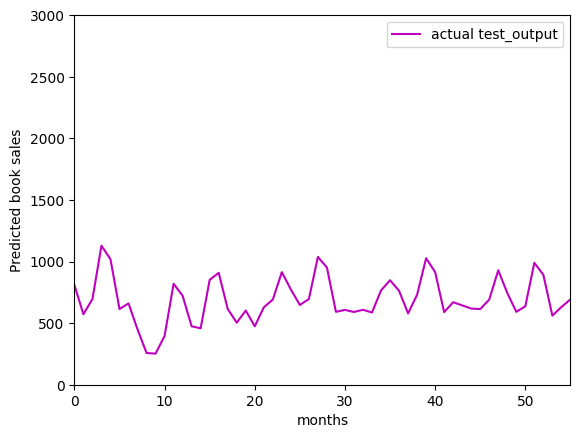

In [24]:
predicted_test = model.predict(test_x,len(test_x))
predicted_test = np.reshape(predicted_test,(len(predicted_test)))
predicted_test = predicted_test * sttdev + mean

x=range(len(test_sales)-MIN)
plt.plot(x, predicted_test,'m-' , label='actual test_output')
plt.axis([0,55,0.0,3000])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()

In [ ]:
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]
mean_squared_error = np.mean(np.square(naive_prediction - test_output))
mean_abs_error = np.mean(np.abs(naive_prediction - test_output))

print(f"naive test mse : {mean_squared_error}")
print(f"naive test mean abs: {mean_abs_error}")

naive test mse : 0.2423526793718338
naive test mean abs: 0.37183910608291626


In [23]:
predicted_train = model.predict(test_x,len(test_x))
mean_squared_error = np.mean(np.square(predicted_train - test_y))
mean_abs_error = np.mean(np.abs(predicted_train - test_y))

print(f"rnn test mse : {mean_squared_error}")
print(f"rnn test mean abs: {mean_abs_error}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
rnn test mse : 0.06031335495093721
rnn test mean abs: 0.19423369373030522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


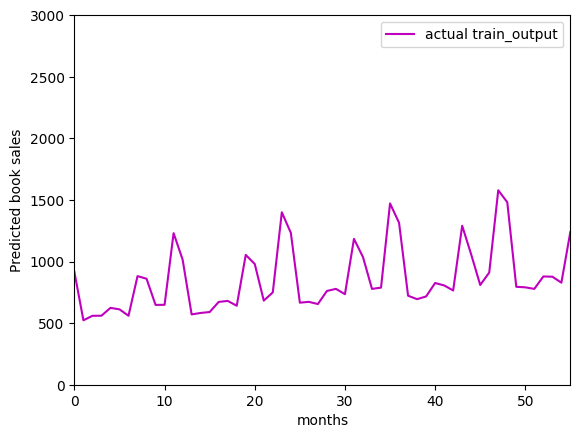

In [11]:
predicted_train = model.predict(train_x,len(train_x))
predicted_train = np.reshape(predicted_train,(len(predicted_train)))
predicted_train = predicted_train * sttdev + mean

x=range(len(train_sales)-MIN)
plt.plot(x, predicted_train,'m-' , label='actual train_output')
plt.axis([0,55,0.0,3000])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()